+++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Naturally, this is work in progress and many things here change
as I learn new methods and models and other stuff.

This notebook uses html-like markdown for coloring text so might not be convertable into LaTeX.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# 1. Problem recognition
<div class="alert alert-block alert-info">First of all we must understand what problem lies before us, before we attempt to solve it.</div>

This is a **classification** problem: based on a given input matrix/vector, we need to predict one of the two binary outcomes:
- 0 (passenger dies), or
- 1 (passenger survives)

Thus we will have to use models designed for Classification.


# 2. Dataframe overview
<div class="alert alert-block alert-info">We must review the dataset we are working with. What is its structure? What types of data are we dealing with? Is there any missing data? Etc.</div>

### Preparing dataframe

In [12]:
# NumPy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("TRAIN DATAFRAME SHAPE =",train_df.shape)
train_df.head()

TRAIN DATAFRAME SHAPE = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our dataframe has **891** observations and **12** features with headers as following:

### Getting feature types
 - Numerical features are **{Age, SibSp, Parch, Fare}**, where:
    - Discrete features are {SibSp, Parch}
    - Continuous features are {Age, Fare}
 - Categorical features are **{Survived, Sex, Embarked}**
 - Ordinal features (__[wiki](https://en.wikipedia.org/wiki/Ordinal_data)__) are **{Pclass}**
 - Mixed features are **{Ticket, Cabin}**


### Getting Dataframe general info

In [151]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Amount of NaNs:**

In [20]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see:
- We have **Missing Data**:
    - NaN values in Age feature (about 20% are NaNs)
    - NaN values in Cabin feature (about 75% are NaNs - a lot!!)
    - NaN values in Embarked feature (3 values are NaNs)

# 3. Initial feature analysis
<div class="alert alert-block alert-info">We have to analyze every feature in order ot understand: which features are the most significant ones (most correlating with response values)? Which features can we safely drop? Which can be modified and how? Which new features can we engineer from the existing ones?</div>

<font color=purple size=5> PassengerID </font>
- **Description**: passanger's unique ID number in this dataset.
- **Analysis**: This feature completely corresponds with rowID so it's actually that. It clearly does not affect suvrival chances and is introduces solely for user's convinience, but sinse Pandas already have indexing mechanism for rows, this feature is completely redundant and can be dropped safely.<br>

- **Conclusion:**
Drop feature PassengerID.
<br>
***
<br>

<font color=purple size=5> Survived </font>
- **Description**: survival of a passenger.
- **Type**: categorical. Values are {0, 1}
- **Analysis**: This feature will be our response vector *y*.
- **Conclusion:** Feature Survived shall be response vector.
<br>
***
<br>

<font color=purple size=5> Pclass </font>
- **Description**: passenger's ticket class.
- **Type**: ordinal. Values are {0, 1, 2}
- **Analysis**: Kaggle hints us that richer passengers were more likely to survive. Let's plot it and see:

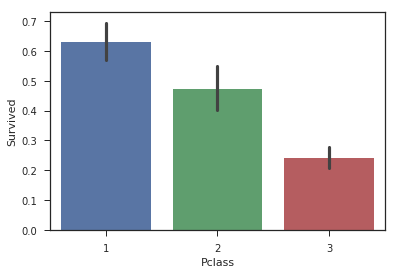

In [193]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.show()

In [22]:
print("PCLASS NaN count:", train_df['Pclass'].isnull().sum())
print("PCLASS unique values:", len(train_df['Pclass'].value_counts()))

PCLASS NaN count: 0
PCLASS unique values: 3


So, indeed, the tendency is clear: *the higher the class -> the greater chance of survival*.
- **Conclusion:** Feature Pclass directly correlates with survival probability, it is an important feature.
<br>
***
<br>

<font color=purple size=5> Name </font>
- **Description**: name of a passenger.
- **Type**: alphanumeric.
- **Analysis**: at this point it's not clear whether this feature will be useful to us. We can make several assumptions:
    - It is expected to see a lot of different unique values in Name feature, thus categorizing it might be impossible or useless.
    - Grouping people by last name may or may not provide us additional info about survival. The problem is people with the same last name do not neccessarily come from the same family.
    - Exctracting honorific title (Mr., Mrs., etc.) may or may not provide us additional info about age or other features.
    - Person's name by itself does not affect his/her survival probability (indeed, you won't survive a shipwreck just because your name is John)


Checking assupmtions:

In [28]:
print("NAME NaN count:", train_df['Name'].isnull().sum())
print("NAME unique values:", len(train_df['Name'].value_counts()))

NAME NaN count: 0
NAME unique values: 891


All Name values appear to be unique: amount of unique Name values is equal to a total amount of Name values (891=891). Trying to create a category for every single name is useless. We can try to categorize by last name and title, if that helps.

In [22]:
last_names = train_df['Name'].apply(lambda name: name.split(',')[0])
print(last_names.value_counts().head(),"\n", "-"*30)
print("Last name unique values:", len(last_names.value_counts()))

Andersson    9
Sage         7
Goodwin      6
Johnson      6
Carter       6
Name: Name, dtype: int64 
 ------------------------------
Last name unique values: 667


So some people were travelling with their families, also there can be people who are not realted to each other and they just happen to have the same last name. To find that out we would need to check how many family members were travelling with them, but still this would not give us much info: for example there were 9 passengers with familiy name Andersson, and that could be 2-3 families, or 1 large family, or whatnot. For now it's hard to use this information.

We could try to use "grouping by last name" to fill in some missing Cabin numbers, assuming that all passengers with the same name belong to the same family and are situated in the same Cabin, but that is not the case: not only different people can have the same family name, but even members of the same family could reside in different Cabins, or even have different last names (for example, a wife retains her maiden last name). So using last names to try and fill some missing data in Cabin feature does not seem very reliable.
There are 667 "family groups", most of them are include 1-2 people. We could create several categories for the biggest families and "rest" for the others?

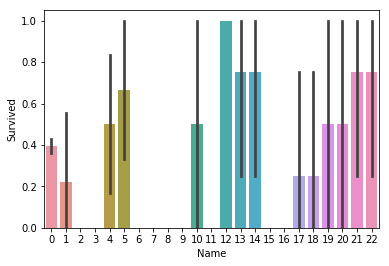

In [23]:
import operator

last_names = pd.DataFrame(last_names)
name_counts = dict(last_names['Name'].value_counts())
name_counts = dict(sorted(name_counts.items(), key=operator.itemgetter(1),reverse=True))

substitution_dict = dict()
new_index = 1
for k, v in name_counts.items():
    if v >= 4:
        substitution_dict.update({k: new_index})
        new_index += 1
    else:
        substitution_dict.update({k: 0})

family_groups = last_names.replace({'Name': substitution_dict})
# family_groups['Survived'] = train_df['Survived']
# sns.barplot(x=family_groups['Name'], y=train_df['Survived'])
# plt.show()

We can see some funny results, for example that family labeled as *21* was saved in its entirety. Its last name is:

In [27]:
print([k for k, v in substitution_dict.items() if v == 12])

['Baclini']


But aside from Baclini family being lucky we cannot say all too much for now?

Next assumption we may check is: may the honorific title help us with age imputation or with building a model in general?

In [41]:
# Code for making a new feature - Title (if it will be needed at all)

title_feature = pd.DataFrame()
title_feature['Title'] = train_df['Name']
for name_string in train_df['Name']:
    title_feature['Title']=train_df.Name.str.extract('([A-Za-z]+)\.', expand=True)

mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss'}
title_feature.replace({'Title': mapping}, inplace=True)
title_feature['Title'].value_counts()

title_feature['Survived'] = train_df['Survived']
#sns.boxplot(x='Title', y='Survived', data=title_feature)
print(title_feature[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', 
                                                                                                 ascending=False))
title_feature.drop('Survived', axis=1, inplace=True)

    Title  Survived
4     Mrs  0.795276
2    Miss  0.704301
1  Master  0.575000
0      Dr  0.428571
3      Mr  0.160000
5     Rev  0.000000


All the reverends did die, and most of women survived. This may serve as a new feature but for now it seems a bit redundant because it basically reflects Sex feature (mainly) and Age / SibSp features (a bit less directly). 

In [242]:
title_feature['Age'] = train_df['Age']
title_feature.groupby('Title')['Age'].mean()

Title
Dr        42.000000
Master     4.574167
Miss      21.860000
Mr        32.740148
Mrs       35.981818
Rev       43.166667
Name: Age, dtype: float64

- **Conclusion**: --to be decided yet--
<br>
***
<br>

<font color=purple size=5> Sex </font>
- **Description**: sex of a passenger.
- **Type**: categorical. Values are {male, female}
- **Analysis**: Kaggle hints us that females were more likely to survive. Let's plot it and see:

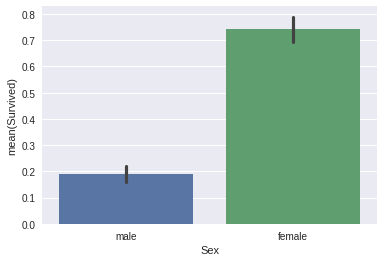

In [8]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

In [25]:
print("SEX NaN count:", train_df['Sex'].isnull().sum())
print("SEX unique values:", len(train_df['Sex'].value_counts()))

SEX NaN count: 0
SEX unique values: 2


No NaNs, 2 unique values.

So, indeed, the tendency is clear: *passenger is female -> greater chance of survival*.
- **Conclusion:** Feature Sex directly correlates with survival probability, it is an important feature.
<br>
***
<br>

<font color=purple size=5> Age </font>
- **Description**: age of a passenger.
- **Type**: numerical - continuous. Values lie in [0..] range.
- **Analysis**: there are 2 immediate problems with this feature.
    - Numerical feature mixed with categorical ones. Solution: we can make several age categories, bins.
    - Feature Age contains NaN values. Solution: we can use imputation.
We could assume that children were rescued first and thus their rate of survival was higher.

In [20]:
print("AGE NaN count:", train_df['Age'].isnull().sum())
print("AGE unique values:", len(train_df['Age'].value_counts()))

AGE NaN count: 177
AGE unique values: 88


First of all it is necessary to fill NaN values. We can use means of various Titles to impute age or we can try various other methods like KNN imputation or something similar.

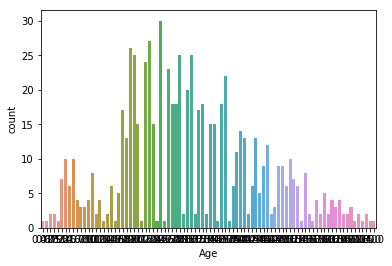

In [14]:
sns.countplot(x=train_df['Age'])
plt.show()

Let's see the distribution of ages corresponding to a certain Title.
* If it's normal distribution, we can use mean
* If it's not really normal, we can use median

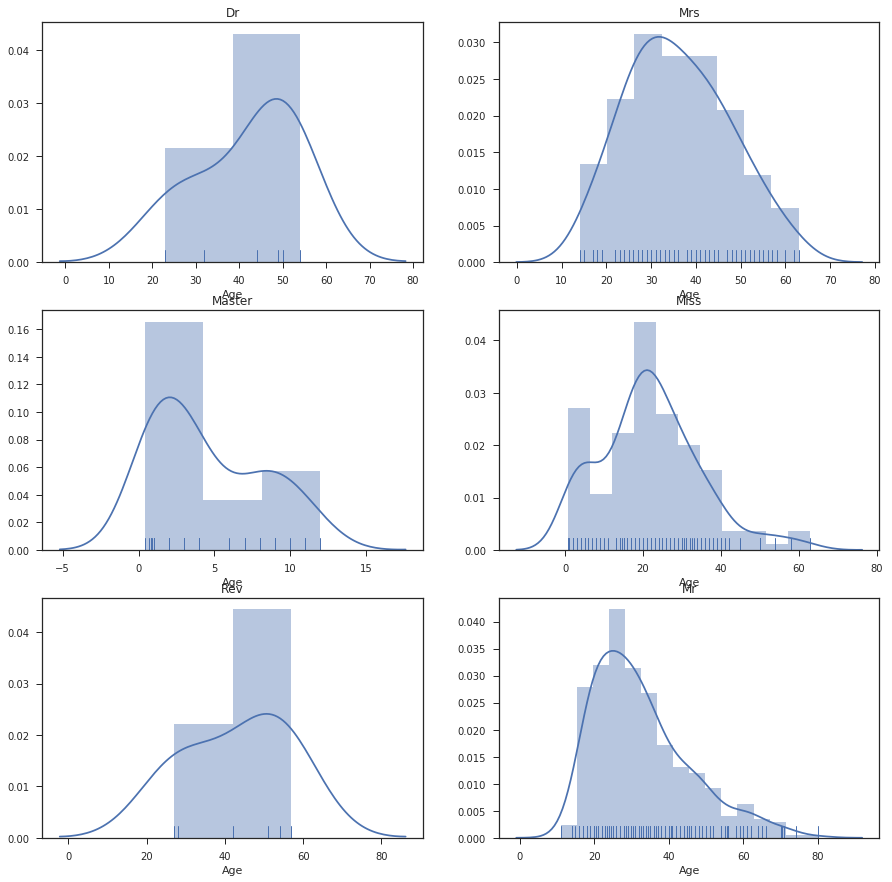

In [132]:
temp = pd.DataFrame()
temp['Title'] = title_feature['Title']
temp['Age'] = train_df['Age'] 

# Forming titles DFs
titles = list(set(temp['Title'].tolist())) # List of all our chosen titles
l = []
for t in titles:
    l.append(temp.loc[(temp.Age.notnull()) & (temp['Title']==t)])

# Creating grid and plotting graphs:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax_list = []
for i in range(1, 7):
    axis = fig.add_subplot(3, 2, i)
    axis.set_title(titles[i-1])
    sns.distplot(l[i-1]['Age'], rug=True, ax = axis)

So it's more or less normal for Mrs title, the rest are less normal (Miss) or far from normal (Master). So we are going to impute a mean age for Mrs (mean of Mrs's, not of all the ages of course) and a median for the rest.

In [159]:
print("Age medians:\n", temp.groupby('Title')['Age'].median(), "\n", "-"*20)
print("Age means:\n", temp.groupby('Title')['Age'].mean())

Age medians:
 Title
Dr        46.5
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.9
Rev       46.5
Name: Age, dtype: float64 
 --------------------
Age means:
 Title
Dr        42.642857
Master     4.466750
Miss      21.790323
Mr        32.119048
Mrs       35.970866
Rev       43.166667
Name: Age, dtype: float64


Thus we are going to impute:
* Dr with 46.5
* Master with 3.5
* Miss with 21.5
* Mr with 30.0
* Mrs with 35.9
* Rev with 46.5

In [164]:
# Note that we perform imputation on TRAIN_DF now!
train_df['Title'] = title_feature['Title']
train_df.head()
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Dr'),'Age']     = 46.5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Master'),'Age'] = 3.5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Miss'),'Age']   = 21.5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Mr'),'Age']     = 30.0
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Mrs'),'Age']    = 35.9
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Rev'),'Age']    = 46.5

# Dropping Title feature for now - because maybe it will not be needed at all, who knows.
train_df.drop('Title', axis=1, inplace=True)

print("AGE NaN count:", train_df['Age'].isnull().sum())

AGE NaN count: 0


And so we eliminated all NaNs.
- **Conclusion:** Feature Age is an important feature, and we need to decide: categorize it via making bins or leave it as continuous as it is?
<br>
***
<br>

<font color=purple size=5> SibSp </font>
- **Description**: Amount of siblings/spouces of a passenger.
- **Type**: numerical, discrete.
- **Analysis**:

In [168]:
print("SIBSP NaN count:", train_df['SibSp'].isnull().sum())
print("SIBSP unique values:", len(train_df['SibSp'].value_counts()))

SIBSP NaN count: 0
SIBSP unique values: 7


There are no NaN values and 7 discrete values. Let us see if SibSp affects survival chances:

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


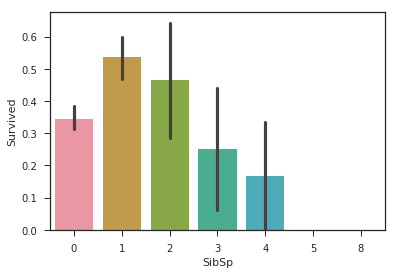

In [205]:
sns.barplot(x='SibSp', y='Survived', data=train_df) 
pd.crosstab([train_df.SibSp],train_df.Survived).style.background_gradient(cmap='summer_r')

So the less siblings/spouces the passenger had, the greater his chance of survival was, generally speaking. Those who travelled alone may have had a bit less chance as well.
- **Conclusion**: --
<br>
***
<br>

<font color=purple size=5> Parch </font>
- **Description**: Amount of parents/children of a passenger.
- **Type**: numerical, discrete.
- **Analysis**:

In [180]:
print("PARCH NaN count:", train_df['Parch'].isnull().sum())
print("PARCH unique values:", len(train_df['Parch'].value_counts()))

PARCH NaN count: 0
PARCH unique values: 7


Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


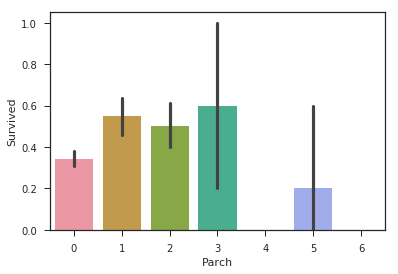

In [197]:
sns.barplot(x="Parch",y="Survived", data=train_df)
pd.crosstab([train_df.Parch],train_df.Survived).style.background_gradient(cmap='summer_r')

Parch feature does not correlate directly with survival rate.
- **Conclusion**: ---
<br>
***
<br>

<font color=purple size=5> Ticket </font>
- **Description**: Passenger's ticket number
- **Type**: numeric and alphanumeric
- **Analysis**:

In [198]:
print("TICKET NaN count:", train_df['Ticket'].isnull().sum())
print("TICKET unique values:", len(train_df['Ticket'].value_counts()))

TICKET NaN count: 0
TICKET unique values: 681


Amount of unique counts is less than total tickets amount, meaning there were tickets assigned to several people at the same time. Can it help us? May it be that "united" by the same ticket had greater chance to survive or to die together?

The problem here is how to work with Ticket feature, as it is a mix of numeric and alphanumeric features.

In [204]:
# train_df[['Ticket', 'Pclass']]

The first *digit* of Ticket number is generally corresponding with the Pclass value; *not always*, but mostly it indeed is the case.

<div class="alert alert-block alert-info">Problem to solve: what is the preffered class of features? We have a classification problem with a mix of categorical and numerical continuous features. Is it better to transform all features to categorical (creating bins for example), to numerical (binarization, etc.) or leave them as is?</div>
For now it's clear that:
1. Some models handle categorical data better, some handle continuous data better.
2. There are models who handle mixed data too, Decision trees and their ensembles such as Random Forest are very good in handling mixed data.
Do we need to transform our data or not? If yes, how? --> to categorical or to numerical? Which models should we choose in each case?



<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br>


--------------------------------------

## 2. Initial feature analysis
What features can be removed without affecting predictions too much (or at all)?
- **PassengerID**: that's basically rowID, nothing more. Seems OK to drop it.
- **Survived**: that's vector with 2 response classes, 0 and 1. Will go to *y*.
- **Pclass**: this seems meaningful (rich guys are more likely to survive?)
- **Name**: this feature does not look very useful. Every passenger has a different Name value (repeated Names are extremely rare), and it seems very unlikely for the name to influence survival. For now we will drop it.
- **Sex**: this seems meaningful (women are more likely to survive?).
- **Age**: this seems meaningful (children are more likely to survive?)
- **SibSp**: unknown for now
- **Parch**: unknown for now
- **Ticket**: unknown for now
- **Fare**: useful? (rich guys are more likely to survive?)
- **Cabin**: cabin may be a meaningful feature, for example upper cabins might be closer to life boats and thus passengers in those cabins may might have a greater chance of survival, but for now it's not clear what to do with it, as it has too much NaN values:

In [4]:
train_df['Cabin'].isnull().sum()

687

- **Cabin**: so Cabin feature has 687 NaNs out of 891 values in total, which means that NaNs are dominating. Question here: what should we do? Should we drop Cabin feature altogether, or should we substitute NaNs with some random values? That however is difficult as missing data in Cabins seems to be of MCAR type - Missing Completely At Random (indeed, we do not have a straightforward cabin numbers list like "1, 2, 3, 4, x, 6, 7" from which we could deduce that x=5; instead Cabin numbers are listed randomly so it would be difficult to predict the expected value in NaN cells)
- **Embarked**: unknown for now. Substitute string values with some labels, say C=0, Q=1, S=2

So for now let's drop PassengerID and Name features and change string values to labels and see what we've got:

In [6]:
train_df.drop(['Name', 'PassengerId'], 1, inplace=True)
test_df.drop(['Name','PassengerId'], 1, inplace=True)
mapping = {'male': 0, 'female': 1, 'C': 0, 'Q': 1, 'S': 2}
train_df = train_df.replace({'Sex': mapping, 'Embarked': mapping})
test_df = test_df.replace({'Sex': mapping, 'Embarked': mapping})
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,1,1,1,35.0,1,0,113803,53.1000,C123,2.0
4,0,3,0,35.0,0,0,373450,8.0500,NaN,2.0


Again as expected: *females were more likely to survive*.

### Age
Let's check the Age now:

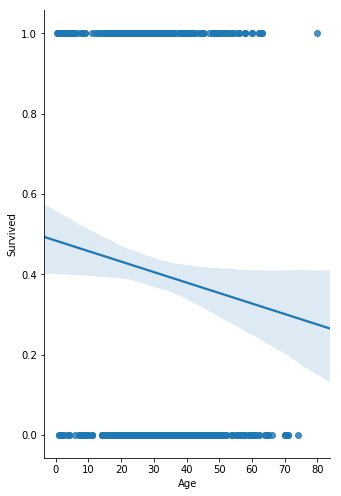

In [9]:
sns.pairplot(train_df, x_vars=['Age'], y_vars='Survived', size=7, aspect=0.7, kind='reg')
plt.show()

It seems like greater age provided less chance of survival? - but the variance here is not that small so it may be not that reliable, I don't know yet.

### SibSp
What about siblings and spouces?

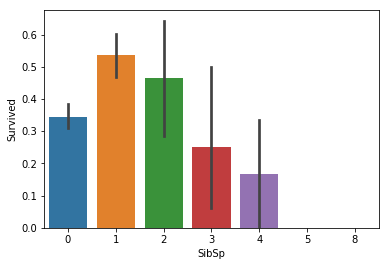

In [10]:
sns.barplot(x="SibSp", y="Survived", data=train_df)
plt.show()

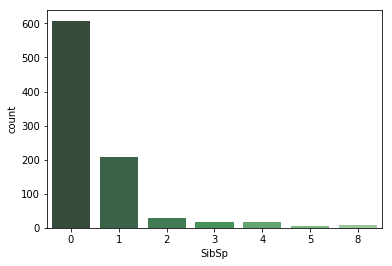

In [11]:
sns.countplot(x="SibSp", data=train_df, palette="Greens_d")
plt.show()

That does not tell us all that much.

### Parch

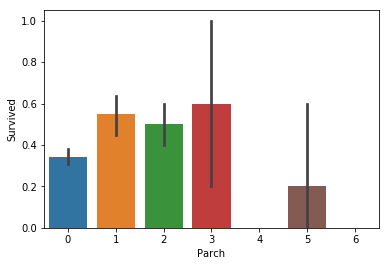

In [13]:
sns.barplot(x="Parch", y="Survived", data=train_df)
plt.show()

Again, I don't really know how to interpret that yet.. Does not seem to be a clear tendency to survival (or dying) here.

### Ticket
That thing is kind of hard to plot, because there are some 700-800+ distinct values. Should I go for pairplot?

**Maybe here we need to do some kind of feature engineering** to break tickets into several various classes? Actually we see that most of the tickets seem to have a 1, 2 or 3 in the beggining of their numerical part. Could that mean Pclass? Let's see:

In [14]:
print(train_df[['Pclass', 'Ticket']].head())
train_df[['Pclass', 'Ticket']].tail()
# To see the whole data:
# train_df[['Pclass', 'Ticket']]

   Pclass            Ticket
0       3         A/5 21171
1       1          PC 17599
2       3  STON/O2. 3101282
3       1            113803
4       3            373450


,Pclass,Ticket
886,2,211536
887,1,112053
888,3,W./C. 6607
889,1,111369
890,3,370376


It seems that in most of the cases this is right, the first digit mainly corresponds with the Pclass with some exceptions. For now that's all I can really say, and for now it seems like I will have to drop this feature (?) until I am able to engineer it somehow into something more meaningful.

### Fare
Fare seems to be a feature best plotted with pairplot:

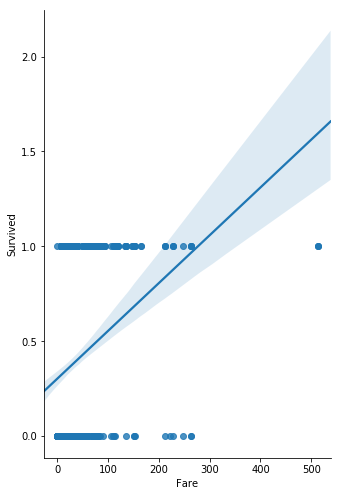

In [15]:
sns.pairplot(train_df, x_vars=['Fare'], y_vars='Survived', size=7, aspect=0.7, kind='reg')
plt.show()

So apart from high variance, it seems that the greater the Fare was, the more likely the passanger was to survive. 

Might it be heplful if we invert Survived and Fare axis? Let's use barplot now as we have only 2 values of X, since X now is Survived and not Fare:

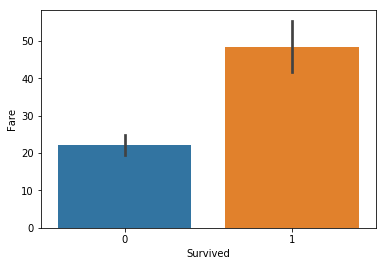

In [16]:
#sns.boxplot(train_df, x_vars=['Survived'], y_vars='Fare', size=7, aspect=0.7, kind='reg')
sns.barplot(x="Survived", y="Fare", data=train_df)
plt.show()

So the bulk of survivors paid a higher fare on average, eh? I'll assume it's correct for now.

### Cabin
Let's see if there were people in the same cabin:

In [17]:
train_df['Cabin'].value_counts().head()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
Name: Cabin, dtype: int64

It seems that yes, there were cabins with several passengers, which may affect the probability of those passengers dying or to surviving together. So this means like a meaningful feature indeed, but what do I do with NaNs?...

### Embarked
What about port of embarkation? It's pure luck I suppose?

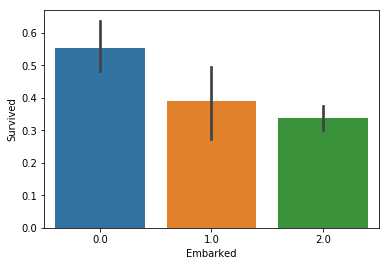

In [20]:
sns.barplot(x="Embarked", y="Survived", data=train_df)
plt.show()

Seems like guys from C were the luckiest, 2nd lucky are people from Q, and lastly from S. Maybe S-guys were too poor, and C's were rich? Let's plot Embarked vs Fare

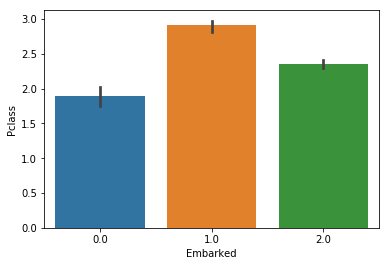

In [24]:
sns.barplot(x="Embarked", y="Pclass", data=train_df)
plt.show()

That doesn't really fit to Pclass plot as passengers from Q were the poorest in terms of Pclass yet they survived better then people from S. So it might be seem that Embarkation feature needs to be taken into account as well.

### Ticket
Like with Cabin, there seem to be several people on some Tickets:

In [5]:
train_df['Ticket'].value_counts().head()

347082      7
1601        7
CA. 2343    7
347088      6
3101295     6
Name: Ticket, dtype: int64

Might this affect chances of those passengeers to survive, or not?

Anyway, if we want to use Ticket and Cabin features, we have to create "labels" for each Ticket type and Cabin type, and do something with those overwhelming NaNs in Cabin.

### Additional visualization
Let's try to see how various features might be related to passenger's survival.

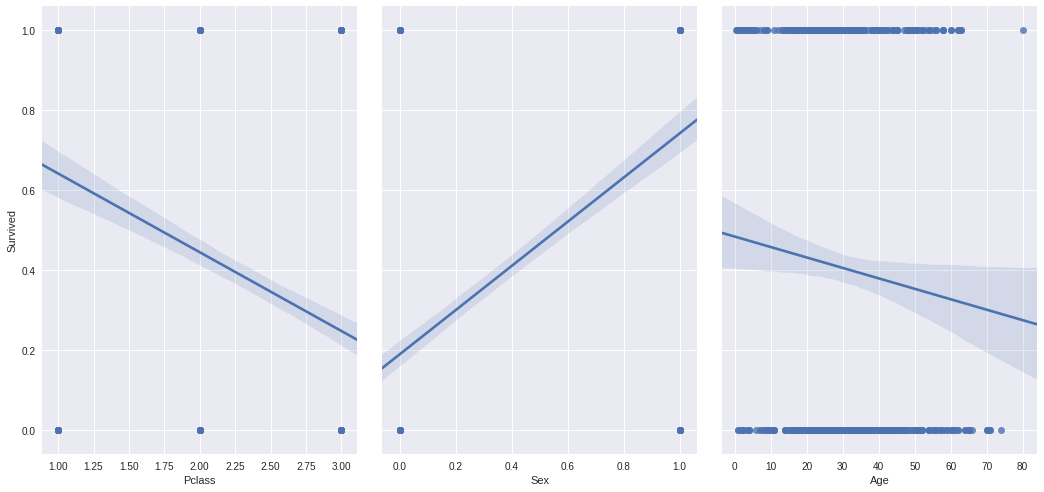

In [37]:
sns.pairplot(train_df, x_vars=['Pclass', 'Sex', 'Age'], y_vars='Survived', size=7, aspect=0.7, kind='reg')
plt.show()

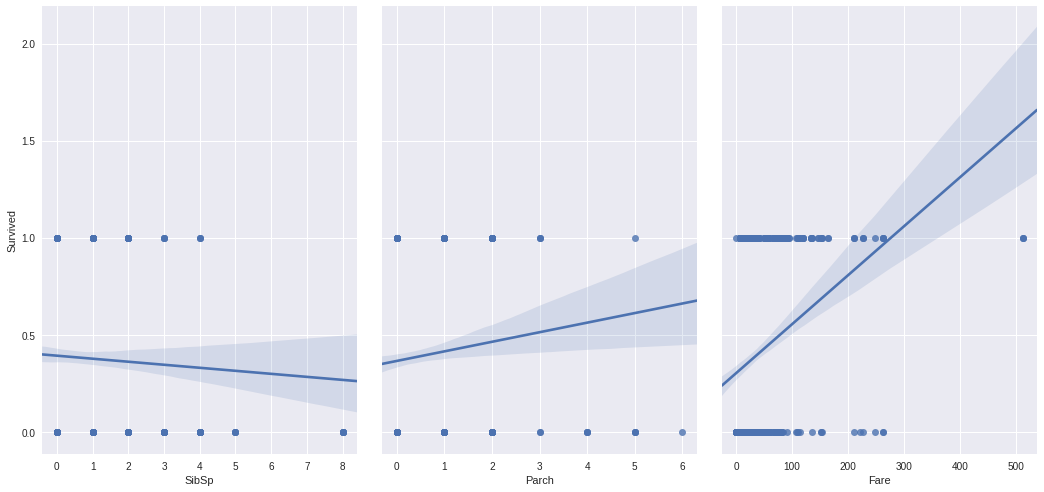

In [7]:
sns.pairplot(train_df, x_vars=['SibSp', 'Parch', 'Fare'], y_vars='Survived', size=7, aspect=0.7, kind='reg')
plt.show()

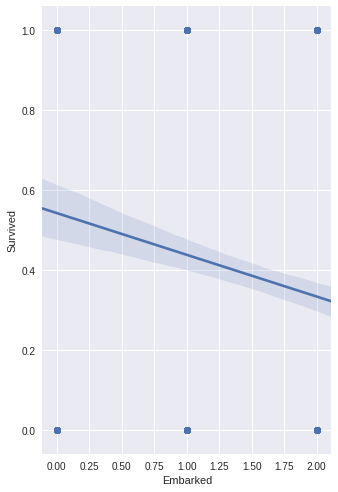

In [8]:
sns.pairplot(train_df, x_vars=['Embarked'], y_vars='Survived', size=7, aspect=0.7, kind='reg')
plt.show()